In [1]:
#Importing Required libraries
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('feature_selection.csv')
df.head()

,owner,location,bike_name,kms_driven,price,age,power,mileage
0,first owner,hyderabad,Avenger,17000.00000,63500.0,6,19.00,35.0
1,first owner,hyderabad,Enfield,50000.00000,115000.0,7,19.80,35.0
2,third owner,bangalore,Duke,24561.00000,63400.0,11,25.00,35.0
3,first owner,bangalore,Pulsar,19718.00000,55000.0,7,17.00,65.0
4,first owner,hyderabad,Apache,11309.13665,120000.0,3,20.21,40.0


# Feature Selection

Checking for Multicollinearity

<AxesSubplot:>

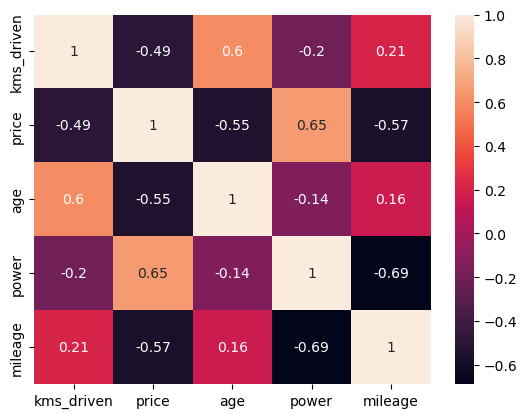

In [3]:
#Finding correlation between features.
sns.heatmap(df.corr(),annot=True)

From the above plot we can infer that:
1) There is high +ve correlation between Age and Kms Driven.                                    
2) There is high +ve correlation between power and price.                                                                  
3) There is high -ve correlation between age and price.      
4) There is high -ve correlation between mileage and price.   
5) There is high -ve correlation between power and mileage.

In [4]:
#From the above plot we can find that there is multicollinerity between power and mileage and kms_driven and age.

In [5]:
#Separating Numeric columns from Non Numeric columns.
num_data=df[['kms_driven','age','power','mileage']]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#Scaling the numeric columns using Standard Scaler. So that each column carries same weight while model building.
scaler=StandardScaler()
num_data=pd.DataFrame(scaler.fit_transform(num_data),columns=num_data.columns)
num_data.head()

,kms_driven,age,power,mileage
0,-0.320680,-0.435072,0.254643,-0.704665
1,2.352723,-0.082997,0.400283,-0.704665
2,0.291853,1.325300,1.346943,-0.704665
3,-0.100489,-0.082997,-0.109457,1.296097
4,-0.781710,-1.491295,0.474923,-0.371205


In [8]:
#Separating Non Numeric Columns along with target variable as we do not want to scale it.
df.drop(['kms_driven','age','power','mileage'],axis=1,inplace=True)
df.head()

,owner,location,bike_name,price
0,first owner,hyderabad,Avenger,63500.0
1,first owner,hyderabad,Enfield,115000.0
2,third owner,bangalore,Duke,63400.0
3,first owner,bangalore,Pulsar,55000.0
4,first owner,hyderabad,Apache,120000.0


In [9]:
#Joining the scaled data with non numeric columns dataframe.
df_final=pd.concat([df,num_data],axis=1)
df_final.head()

,owner,location,bike_name,price,kms_driven,age,power,mileage
0,first owner,hyderabad,Avenger,63500.0,-0.320680,-0.435072,0.254643,-0.704665
1,first owner,hyderabad,Enfield,115000.0,2.352723,-0.082997,0.400283,-0.704665
2,third owner,bangalore,Duke,63400.0,0.291853,1.325300,1.346943,-0.704665
3,first owner,bangalore,Pulsar,55000.0,-0.100489,-0.082997,-0.109457,1.296097
4,first owner,hyderabad,Apache,120000.0,-0.781710,-1.491295,0.474923,-0.371205


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#Applying Label Encoding on Columns with categorical data.
enc=LabelEncoder()
df_final['owner']=enc.fit_transform(df_final['owner'])
df_final['location']=enc.fit_transform(df_final['location'])
df_final['bike_name']=enc.fit_transform(df_final['bike_name'])
df_final.head()

,owner,location,bike_name,price,kms_driven,age,power,mileage
0,0,205,2,63500.0,-0.320680,-0.435072,0.254643,-0.704665
1,0,205,12,115000.0,2.352723,-0.082997,0.400283,-0.704665
2,3,54,11,63400.0,0.291853,1.325300,1.346943,-0.704665
3,0,54,34,55000.0,-0.100489,-0.082997,-0.109457,1.296097
4,0,205,0,120000.0,-0.781710,-1.491295,0.474923,-0.371205


# Finding important features using Exhaustive Feature Selection Technique

In [78]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor

In [81]:
X1_train=df_final.drop(['price'],axis=1)
Y1_train=df_final['price']

In [82]:
efs=ExhaustiveFeatureSelector(RandomForestRegressor(n_jobs=-1),
                                                   min_features=1,
                                                   max_features=6,
                                                   scoring="r2",
                                                   cv=2,
                                                   n_jobs=-1).fit(X1_train,Y1_train)

Features: 126/126

In [83]:
efs.best_feature_names_

('owner', 'location', 'kms_driven', 'age', 'power', 'mileage')

In [84]:
efs.best_score_

0.8574199332215204

In [85]:
s=pd.DataFrame.from_dict(efs.get_metric_dict()).T
s[s['avg_score']>0.85].sort_values(by='avg_score',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
123,"(0, 1, 3, 4, 5, 6)","[0.8403029358996964, 0.8745369305433444]",0.85742,"(owner, location, kms_driven, age, power, mile...",0.073648,0.017117,0.017117
125,"(1, 2, 3, 4, 5, 6)","[0.8427710494769375, 0.8719795565294115]",0.857375,"(location, bike_name, kms_driven, age, power, ...",0.062837,0.014604,0.014604
96,"(2, 4, 5, 6)","[0.8450770840200944, 0.8657900326456586]",0.855434,"(bike_name, age, power, mileage)",0.04456,0.010356,0.010356
111,"(0, 2, 4, 5, 6)","[0.8430508247945283, 0.8675723440374224]",0.855312,"(owner, bike_name, age, power, mileage)",0.052754,0.012261,0.012261
124,"(0, 2, 3, 4, 5, 6)","[0.8443371729090234, 0.865842142743729]",0.85509,"(owner, bike_name, kms_driven, age, power, mil...",0.046264,0.010752,0.010752
117,"(1, 3, 4, 5, 6)","[0.8398174680194065, 0.8677568503647466]",0.853787,"(location, kms_driven, age, power, mileage)",0.060107,0.01397,0.01397
62,"(4, 5, 6)","[0.843941992416628, 0.8630932394685975]",0.853518,"(age, power, mileage)",0.041201,0.009576,0.009576
82,"(0, 4, 5, 6)","[0.8414181202668235, 0.8654988500006635]",0.853458,"(owner, age, power, mileage)",0.051806,0.01204,0.01204
118,"(2, 3, 4, 5, 6)","[0.8431488099226266, 0.8623414320118827]",0.852745,"(bike_name, kms_driven, age, power, mileage)",0.04129,0.009596,0.009596
76,"(0, 2, 4, 5)","[0.8391037984745725, 0.8661001585596606]",0.852602,"(owner, bike_name, age, power)",0.058078,0.013498,0.013498


1) Thus from above table we can infer that minimum features required to get approx. same accuracy as achieved by using all variiables to train our model are [bike_name, age, power].                                                     


In [18]:
#Exporting final CSV file.
#df_final.to_csv('modelbuilding.csv')

In [19]:
#------------------------------End of Feature Selection-----------------------------------------#

# Model Building

In [110]:
df2=pd.read_csv('modelbuilding.csv')
df2.head()

,owner,location,bike_name,kms_driven,age,power,mileage,price
0,0,205,2,-0.320680,-0.435072,0.254643,-0.704665,63500.0
1,0,205,12,2.352723,-0.082997,0.400283,-0.704665,115000.0
2,3,54,11,0.291853,1.325300,1.346943,-0.704665,63400.0
3,0,54,34,-0.100489,-0.082997,-0.109457,1.296097,55000.0
4,0,205,0,-0.781710,-1.491295,0.474923,-0.371205,120000.0


In [111]:
#Making two set of variables to compare accuracy of models using minimum number of varaibles and with all variables.

#X=df2[['age','bike_name','power']] 
X=df2[['bike_name','kms_driven','age','power','mileage','owner','location']]    
Y=df2['price']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#Splitting data into Training and Testing data.
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4667, 7)
(4667,)
(1556, 7)
(1556,)


In [114]:
#Importing all Regression models for model building.
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [115]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [116]:
rm=RandomForestRegressor(max_depth=7,n_estimators=200,random_state=37)
rm.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=37)

In [117]:
dtree=DecisionTreeRegressor(random_state=77)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=77)

In [118]:
rid=Ridge()
rid.fit(x_train,y_train)

Ridge()

In [119]:
las=Lasso()
las.fit(x_train,y_train)

Lasso()

In [120]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [121]:
gboost=GradientBoostingRegressor()
gboost.fit(x_train,y_train)

GradientBoostingRegressor()

In [122]:
adaboost=AdaBoostRegressor()
adaboost.fit(x_train,y_train)

AdaBoostRegressor()

In [123]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [124]:
#Precdicting the accuracy of models.
pred_lm=lm.predict(x_test)
pred_rm=rm.predict(x_test)
pred_dt=dtree.predict(x_test)
pred_rid=rid.predict(x_test)
pred_las=las.predict(x_test)
pred_knn=knn.predict(x_test)
pred_gboost=gboost.predict(x_test)
pred_adaboost=adaboost.predict(x_test)
pred_xgb=xgb.predict(x_test)

In [125]:
from sklearn.metrics import r2_score

In [126]:
Acc1=r2_score(y_test,pred_dt)*100
print('Accuracy of Decision Tree Regression: ',Acc1)
Acc2=r2_score(y_test,pred_lm)*100
print('Accuracy of Linear Regression: ',Acc2)
Acc3=r2_score(y_test,pred_rm)*100
print('Accuracy of Random Forest Regression: ',Acc3)
Acc4=r2_score(y_test,pred_rid)*100
print('Accuracy of Ridge Regression: ',Acc4)
Acc5=r2_score(y_test,pred_las)*100
print('Accuracy of Lasso Regression: ',Acc5)
Acc6=r2_score(y_test,pred_knn)*100
print('Accuracy of KNN Regression: ',Acc6)
Acc7=r2_score(y_test,pred_gboost)*100
print('Accuracy of GBoost Regression: ',Acc7)
Acc8=r2_score(y_test,pred_adaboost)*100
print('Accuracy of Adaboost Regression: ',Acc8)
Acc10=r2_score(y_test,pred_xgb)*100
print('Accuracy of XGB Regression: ',Acc10)

Accuracy of Decision Tree Regression:  79.33755297628858
Accuracy of Linear Regression:  69.30417216357381
Accuracy of Random Forest Regression:  88.77155561262194
Accuracy of Ridge Regression:  69.30381608445812
Accuracy of Lasso Regression:  69.3040889122619
Accuracy of KNN Regression:  71.6939987010884
Accuracy of GBoost Regression:  89.73710041588984
Accuracy of Adaboost Regression:  70.10629440821836
Accuracy of XGB Regression:  89.77934074253244


Thus XG Boost Algoritm has the highest accurcay among all models.

# Applying K Fold Cross Validation

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [128]:
#Appending all models in a list.
classification_models=[]
classification_models.append(('Decision Tree',DecisionTreeRegressor(random_state=77)))
classification_models.append(('Linear Regression',LinearRegression()))
classification_models.append(('Random Forest',RandomForestRegressor(max_depth=7,n_estimators=200,random_state=37)))
classification_models.append(('Ridge Regression',Ridge()))
classification_models.append(('Lasso Regression',Lasso()))
classification_models.append(('KNN Regression',KNeighborsRegressor()))
classification_models.append(('XGB Regression',XGBRegressor()))
classification_models.append(('GradientBoosting Regression',GradientBoostingRegressor()))
classification_models.append(('AdaBoost Regression',AdaBoostRegressor()))

In [129]:
for name,models in classification_models:
    kfold =KFold(n_splits=10,random_state=22,shuffle=True)
    result=cross_val_score(models,X,Y,cv=kfold,scoring='r2')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Decision Tree: Mean Accuracy = 80.34% - SD Accuracy = 1.69%
Linear Regression: Mean Accuracy = 67.72% - SD Accuracy = 1.77%
Random Forest: Mean Accuracy = 87.16% - SD Accuracy = 1.20%
Ridge Regression: Mean Accuracy = 67.72% - SD Accuracy = 1.77%
Lasso Regression: Mean Accuracy = 67.72% - SD Accuracy = 1.77%
KNN Regression: Mean Accuracy = 71.79% - SD Accuracy = 3.25%
XGB Regression: Mean Accuracy = 89.14% - SD Accuracy = 1.20%
GradientBoosting Regression: Mean Accuracy = 88.34% - SD Accuracy = 1.10%
AdaBoost Regression: Mean Accuracy = 69.04% - SD Accuracy = 2.89%


After applying K Fold CV the best models again comes out to be XG Boost.

# Models Accuracy with features [age, bike_name, power]

In [130]:
# Decision Tree: Mean Accuracy = 86.80% - SD Accuracy = 1.40%
# Linear Regression: Mean Accuracy = 64.22% - SD Accuracy = 2.23%
# Random Forest: Mean Accuracy = 86.67% - SD Accuracy = 1.51%
# Ridge Regression: Mean Accuracy = 64.22% - SD Accuracy = 2.23%
# Lasso Regression: Mean Accuracy = 64.22% - SD Accuracy = 2.23%
# KNN Regression: Mean Accuracy = 85.23% - SD Accuracy = 1.48%
# XGB Regression: Mean Accuracy = 87.30% - SD Accuracy = 1.43%
# GradientBoosting Regression: Mean Accuracy = 87.15% - SD Accuracy = 1.39%
# AdaBoost Regression: Mean Accuracy = 71.80% - SD Accuracy = 1.76%

# Models Accuracy with all features.

In [107]:
# Decision Tree: Mean Accuracy = 80.34% - SD Accuracy = 1.69%
# Linear Regression: Mean Accuracy = 67.72% - SD Accuracy = 1.77%
# Random Forest: Mean Accuracy = 87.16% - SD Accuracy = 1.20%
# Ridge Regression: Mean Accuracy = 67.72% - SD Accuracy = 1.77%
# Lasso Regression: Mean Accuracy = 67.72% - SD Accuracy = 1.77%
# KNN Regression: Mean Accuracy = 71.79% - SD Accuracy = 3.25%
# XGB Regression: Mean Accuracy = 89.14% - SD Accuracy = 1.20%
# GradientBoosting Regression: Mean Accuracy = 88.34% - SD Accuracy = 1.10%
# AdaBoost Regression: Mean Accuracy = 69.04% - SD Accuracy = 2.89%

# Thus compairing above two results we can say that best model for our data is XG Boost.